# ASTRO 257: Project 0

Alejandra Rosselli-Calderon

In [19]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from photutils.centroids import centroid_com, centroid_sources

#### Open the file test.fits in Python.

In [20]:
data = fits.open('test.fits')

In [21]:
data[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                  256 / STANDARD FITS FORMAT                           
NAXIS2  =                  256 / STANDARD FITS FORMAT                           
ORIGIN  = 'Spitzer Science Center' / Organization generating this FITS file     
CREATOR = 'S16.1.0 '           / SW version used to create this FITS file       
TELESCOP= 'Spitzer '           / SPITZER Space Telescope                        
INSTRUME= 'IRAC    '           / SPITZER Space Telescope instrument ID          
CHNLNUM =                    2 / 1 digit instrument channel number              
EXPTYPE = 'sci     '           / Exposure Type                                  
REQTYPE = 'IER     '           / Request type (AOR, IER, or  SER)               
AOT_TYPE= 'IRAC    '        

In [22]:
data.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     269   (256, 256)   float32   


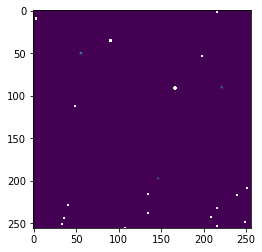

In [23]:
image = data[0].data
plt.imshow(image)

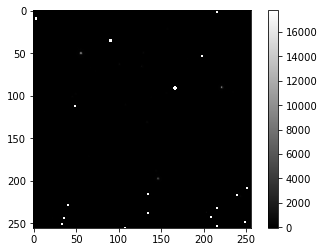

In [24]:
plt.imshow(image, cmap='gray')
plt.colorbar()

In [25]:
image.shape

(256, 256)

#### Find brightest star

In [26]:
np.count_nonzero(np.isnan(image))

26

In [27]:
print('Min:', np.nanmin(image))
print('Max:', np.nanmax(image))
print('Mean:', np.nanmean(image))
print('Stdev:', np.nanstd(image))

Min: -39.97457
Max: 17760.541
Mean: 2.5579095
Stdev: 117.186134


In [28]:
max_index = np.where(image == np.nanmax(image))
max_index

(array([50]), array([56]))

#### Crop a 40x40 pixel region around the brightest star in the image.

In [29]:
position = (56, 50)
size = (40, 40)     # pixels
cutout = Cutout2D(image, position, size)

In [30]:
print(cutout.shape)

(40, 40)


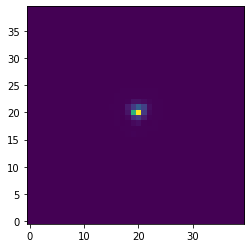

In [31]:
plt.imshow(cutout.data, origin='lower')

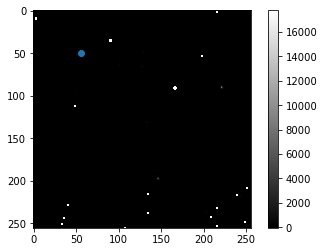

In [32]:
plt.imshow(image, cmap='gray')
plt.plot(56,50, 'o')
plt.colorbar()

#### Save the cropped region as test2.fits.

In [33]:
hdu = fits.open('test.fits')[0]
wcs = WCS(hdu.header)
hdu.data = cutout.data
hdu.header.update(wcs.to_header())
cutout_filename = 'test2.fits'
hdu.writeto(cutout_filename, overwrite=True)

#### Use the code photutils to measure the centroid of this star in the uncropped region


In [34]:
x, y = centroid_sources(image, max_index[0][0], max_index[1][0], box_size=21,
                        centroid_func=centroid_com)

In [35]:
x

array([55.59600389])

In [36]:
y

array([50.34614598])